<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/MoneyFlowIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import warnings
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
# Set the graph style
plt.style.use('fast')
# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2019-01-01', end='2021-03-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.505024
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.669640
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.149662
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.069202
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.756794
...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998


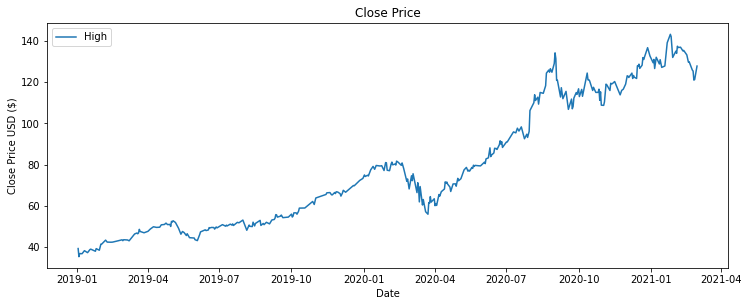

In [3]:
# Visualize the data
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close Price')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [4]:
# Calculate the typical price
typical_price = (df['Close'] + df['High'] + df['Low']) / 3
typical_price

Date
2019-01-02     39.250000
2019-01-03     35.825834
2019-01-04     36.717500
2019-01-07     36.888332
2019-01-08     37.590834
                 ...    
2021-02-23    123.653333
2021-02-24    124.380000
2021-02-25    122.663333
2021-02-26    122.436666
2021-03-01    126.170001
Length: 544, dtype: float64

In [5]:
# Initialize the period for later
period = 14
# Calculate the money flow
money_flow = typical_price * df['Volume']
money_flow

Date
2019-01-02    5.815233e+09
2019-01-03    1.308534e+10
2019-01-04    8.607625e+09
2019-01-07    8.082647e+09
2019-01-08    6.168701e+09
                  ...     
2021-02-23    1.957098e+10
2021-02-24    1.381114e+10
2021-02-25    1.817864e+10
2021-02-26    2.011879e+10
2021-03-01    1.463551e+10
Length: 544, dtype: float64

In [6]:
# Get all of the positive and negative money flow
positive_flow = []
negative_flow = []
# Loop through typical price calculations
for i in range(1, len(typical_price)):
   if typical_price[i] > typical_price[i-1]:
      positive_flow.append(money_flow[i-1])
      negative_flow.append(0)
   elif typical_price[i] < typical_price[i-1]:
      negative_flow.append(money_flow[i-1])
      positive_flow.append(0)
   else:
      positive_flow.append(0)
      negative_flow.append(0)

In [15]:
# Storage for the last 14 days
positive_mf = []
negative_mf = []
for i in range(period-1, len(positive_flow)):
   positive_mf.append(sum(positive_flow[i+1-period:i+1]))
for i in range(period-1, len(negative_flow)):
   negative_mf.append(sum(negative_flow[i+1-period:i+1]))

In [16]:
# Calculate the money flow index
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf)))
# Print the MFI values
mfi

array([70.75578124, 72.64921846, 69.31261119, 60.58498326, 58.25964146,
       58.44537936, 60.27029269, 68.50906631, 74.63983054, 74.80476068,
       75.43324886, 69.07951892, 62.36891521, 68.69702697, 74.46983761,
       79.26686377, 74.15187184, 80.73774512, 75.08762728, 73.94733288,
       64.84349112, 62.64457437, 61.25561422, 53.5889525 , 45.28730206,
       45.34658127, 54.94173161, 55.33086385, 47.63460649, 41.02597525,
       41.18165751, 34.04297303, 41.5429281 , 44.02524902, 52.92766623,
       54.97689041, 55.73838843, 63.78413141, 61.97352287, 69.55149005,
       69.94912716, 59.01647964, 56.50212532, 53.2477705 , 60.29537581,
       65.5935465 , 65.51599559, 65.0438721 , 64.8197161 , 64.31840117,
       64.4044809 , 62.91812209, 68.26457214, 67.96584101, 59.91272588,
       64.17034365, 67.65426963, 78.01787147, 76.04397794, 75.86436472,
       76.55431142, 76.7138662 , 76.24045867, 76.38914644, 70.50735321,
       64.72373654, 64.80800274, 57.5035302 , 69.53384634, 61.02

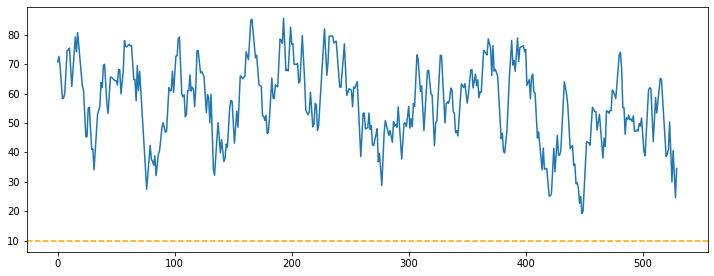

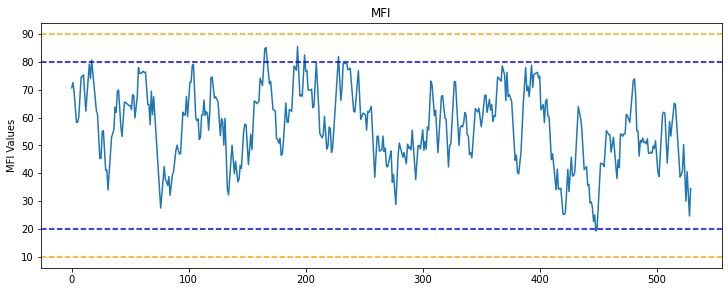

In [20]:
# Create a data frame and put the MFI in
df2 = pd.DataFrame()
df2['MFI'] = mfi
# Create a plot for the MFI values
plt.figure(figsize=(12.2, 4.5))
plt.plot(df2['MFI'], label='MFI')
plt.axhline(10, linestyle='--', color='orange')
# Show the MFI
df2 = pd.DataFrame()
df2['MFI'] = mfi
# Create a plot
plt.figure(figsize=(12.2, 4.5))
plt.plot(df2['MFI'], label = 'MFI')
plt.axhline(10, linestyle='--', color='orange')
plt.axhline(20, linestyle='--', color='blue')
plt.axhline(80, linestyle='--', color='blue')
plt.axhline(90, linestyle='--', color='orange')
plt.title('MFI')
plt.ylabel('MFI Values')
plt.show()

In [21]:
# Create a data frame to store the additional buy sell signals
limited_df = pd.DataFrame()
limited_df = df[period:]
limited_df['MFI'] = mfi
# Print the limited data frame for debugging
limited_df

,High,Low,Open,Close,Volume,Adj Close,MFI
Date,,,,,,,
2019-01-23,38.785000,37.924999,38.537498,38.480000,92522400.0,37.529724,70.755781
2019-01-24,38.619999,37.935001,38.527500,38.174999,101766000.0,37.232254,72.649218
2019-01-25,39.532501,38.580002,38.869999,39.439999,134142000.0,38.466007,69.312611
2019-01-28,39.082500,38.415001,38.947498,39.075001,104768400.0,38.110027,60.584983
2019-01-29,39.532501,38.527500,39.062500,38.669998,166348800.0,37.715031,58.259641
...,...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001,29.977920
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998,40.586624
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998,32.731437


In [22]:
# Automate the buy and sell signals
def get_signal(data, high, low):
  buy_signal = []
  sell_signal = []

  for i in range(len(data['MFI'])):
    if data['MFI'][i] > high:
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['MFI'][i] < low:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

  return (buy_signal, sell_signal)
# Add new columns for Buy and Sell
limited_df['Buy'] = get_signal(limited_df, 80, 20)[0]
limited_df['Sell'] = get_signal(limited_df, 80, 20)[1]
# Show the data
limited_df

,High,Low,Open,Close,Volume,Adj Close,MFI,Buy,Sell
Date,,,,,,,,,
2019-01-23,38.785000,37.924999,38.537498,38.480000,92522400.0,37.529724,70.755781,NaN,NaN
2019-01-24,38.619999,37.935001,38.527500,38.174999,101766000.0,37.232254,72.649218,NaN,NaN
2019-01-25,39.532501,38.580002,38.869999,39.439999,134142000.0,38.466007,69.312611,NaN,NaN
2019-01-28,39.082500,38.415001,38.947498,39.075001,104768400.0,38.110027,60.584983,NaN,NaN
2019-01-29,39.532501,38.527500,39.062500,38.669998,166348800.0,37.715031,58.259641,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001,29.977920,NaN,NaN
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998,40.586624,NaN,NaN
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998,32.731437,NaN,NaN


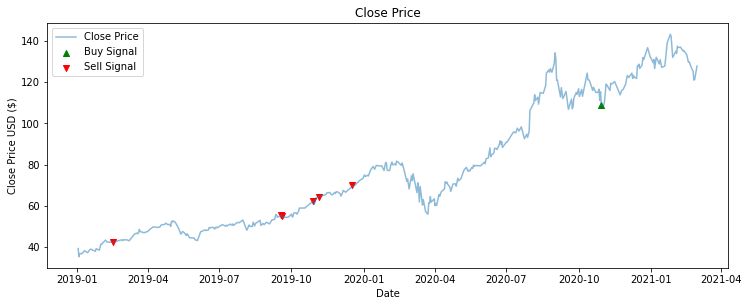

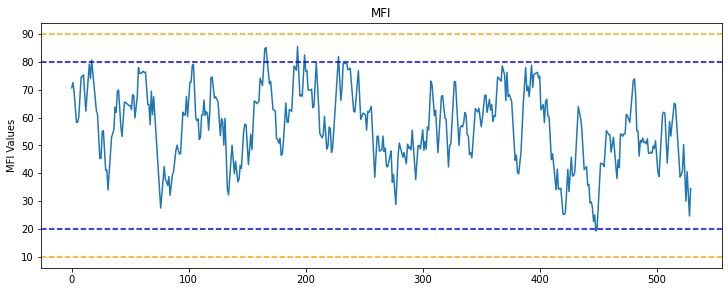

In [23]:
# Plot the data
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label = 'Close Price', alpha = 0.5)
plt.scatter(limited_df.index, limited_df['Buy'], color='green', label='Buy Signal', marker='^', alpha = 1)
plt.scatter(limited_df.index, limited_df['Sell'], color='red', label='Sell Signal', marker='v', alpha = 1)
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()
# Create a plot
plt.figure(figsize=(12.2, 4.5))
plt.plot(df2['MFI'], label = 'MFI')
plt.axhline(10, linestyle='--', color='orange')
plt.axhline(20, linestyle='--', color='blue')
plt.axhline(80, linestyle='--', color='blue')
plt.axhline(90, linestyle='--', color='orange')
plt.title('MFI')
plt.ylabel('MFI Values')
plt.show()